In [1]:
import numpy as np
import pandas as pd
from typing import Any, Dict, List, Tuple
import seaborn as sns

In [2]:
from recommend.utils import PROJ_ROOT

movies = pd.read_pickle(PROJ_ROOT / 'data'/ 'movies.pkl')
ratings = pd.read_pickle(PROJ_ROOT / 'data' / 'ratings.pkl')

# Drop irrelevant columns
movies = movies.drop(columns=['kind', 'length', 'poster', 'foreign_titles'])

display(movies.head(3))
ratings.head(3)

,title,description,genres,countries,year,creators
movie_id,,,,,,
230421-houbicky,Houbičky,"Partička amerických teenagerů, která si vyrazi...","[Horor, Thriller]","[Irsko, Velká Británie, Dánsko]",2007,"{'Režie': [('/tvurce/4690-paddy-breathnach/', ..."
10789-prvni-liga,První liga,V nejvyšší lize získávají hráči baseballu boha...,"[Komedie, Sportovní]",[USA],1989,"{'Režie': [('/tvurce/4010-david-s-ward/', 'Dav..."
235032-yes-man,Yes Man,"Carl Allen je zatrpklý bankovní úředník, který...","[Komedie, Romantický]",[USA],2008,"{'Režie': [('/tvurce/8883-peyton-reed/', 'Peyt..."


,username,movie_id,stars,date,comment
0,kinghome,230421-houbicky,5.0,2011-11-13,Hodnocení některých šašků tady opravdu necháp...
1,SimonShot,230421-houbicky,5.0,2012-12-19,Tento snímek je zajímavý už jenom tím že se n...
2,blackend,230421-houbicky,5.0,2010-09-04,Pohoda a vzhledem k dobré atmosféře a nízkému...


## Creators
Convert the structured text to list of names including: top_n actors, director, composer (we decided not to differentiate between roles to make it simpler)



In [3]:
def creators2list(creators : str, top_n_actors : int = 3) -> List[str]:
    """Returns a list of `top_n_actors`, director, and a composer."""
    result = []
    
    if 'Hrají' in creators:
        result = creators['Hrají'][:top_n_actors]
        result = list(map(lambda x: x[1], result))

    if 'Režie' in creators:
        result += [creators['Režie'][0][1]]
    if 'Hudba' in creators:
        result += [creators['Hudba'][0][1]]
    return result

    
creators2list(movies['creators'][0])

['Lindsey Haun',
 'Jack Huston',
 'Max Kasch',
 'Paddy Breathnach',
 'Dario Marianelli']

In [4]:
# Convert creators column to list of creators
movies['creators'] = movies['creators'].apply(creators2list)

In [5]:
import collections

def analyse_freq(list_of_lists : List[List[Any]]) -> List[Tuple[Any, int]]:
    """
    Counts occurences of items in a list of lists
    and returns them in descending order as tuples <item, count>."""

    flat_list = [item for sublist in list_of_lists for item in sublist]
    counter = collections.Counter(flat_list)
    return counter.most_common(len(counter))


---

## Countries
Frequency analysis of countries participating in the movie creation.  


TODO: Consider two approaches  
a) consider as relevant only countries with 100+ movies per country  
b) the fact that a user likes (e.g. 30/58) Norwegian movies might carry more info than liking mostly US movies (5764)  
c) use umbeddings

In [6]:
item_count_list = analyse_freq(movies['countries'])

In [7]:
countries, counts = [list(t) for t in zip(*item_count_list)]

<AxesSubplot:>

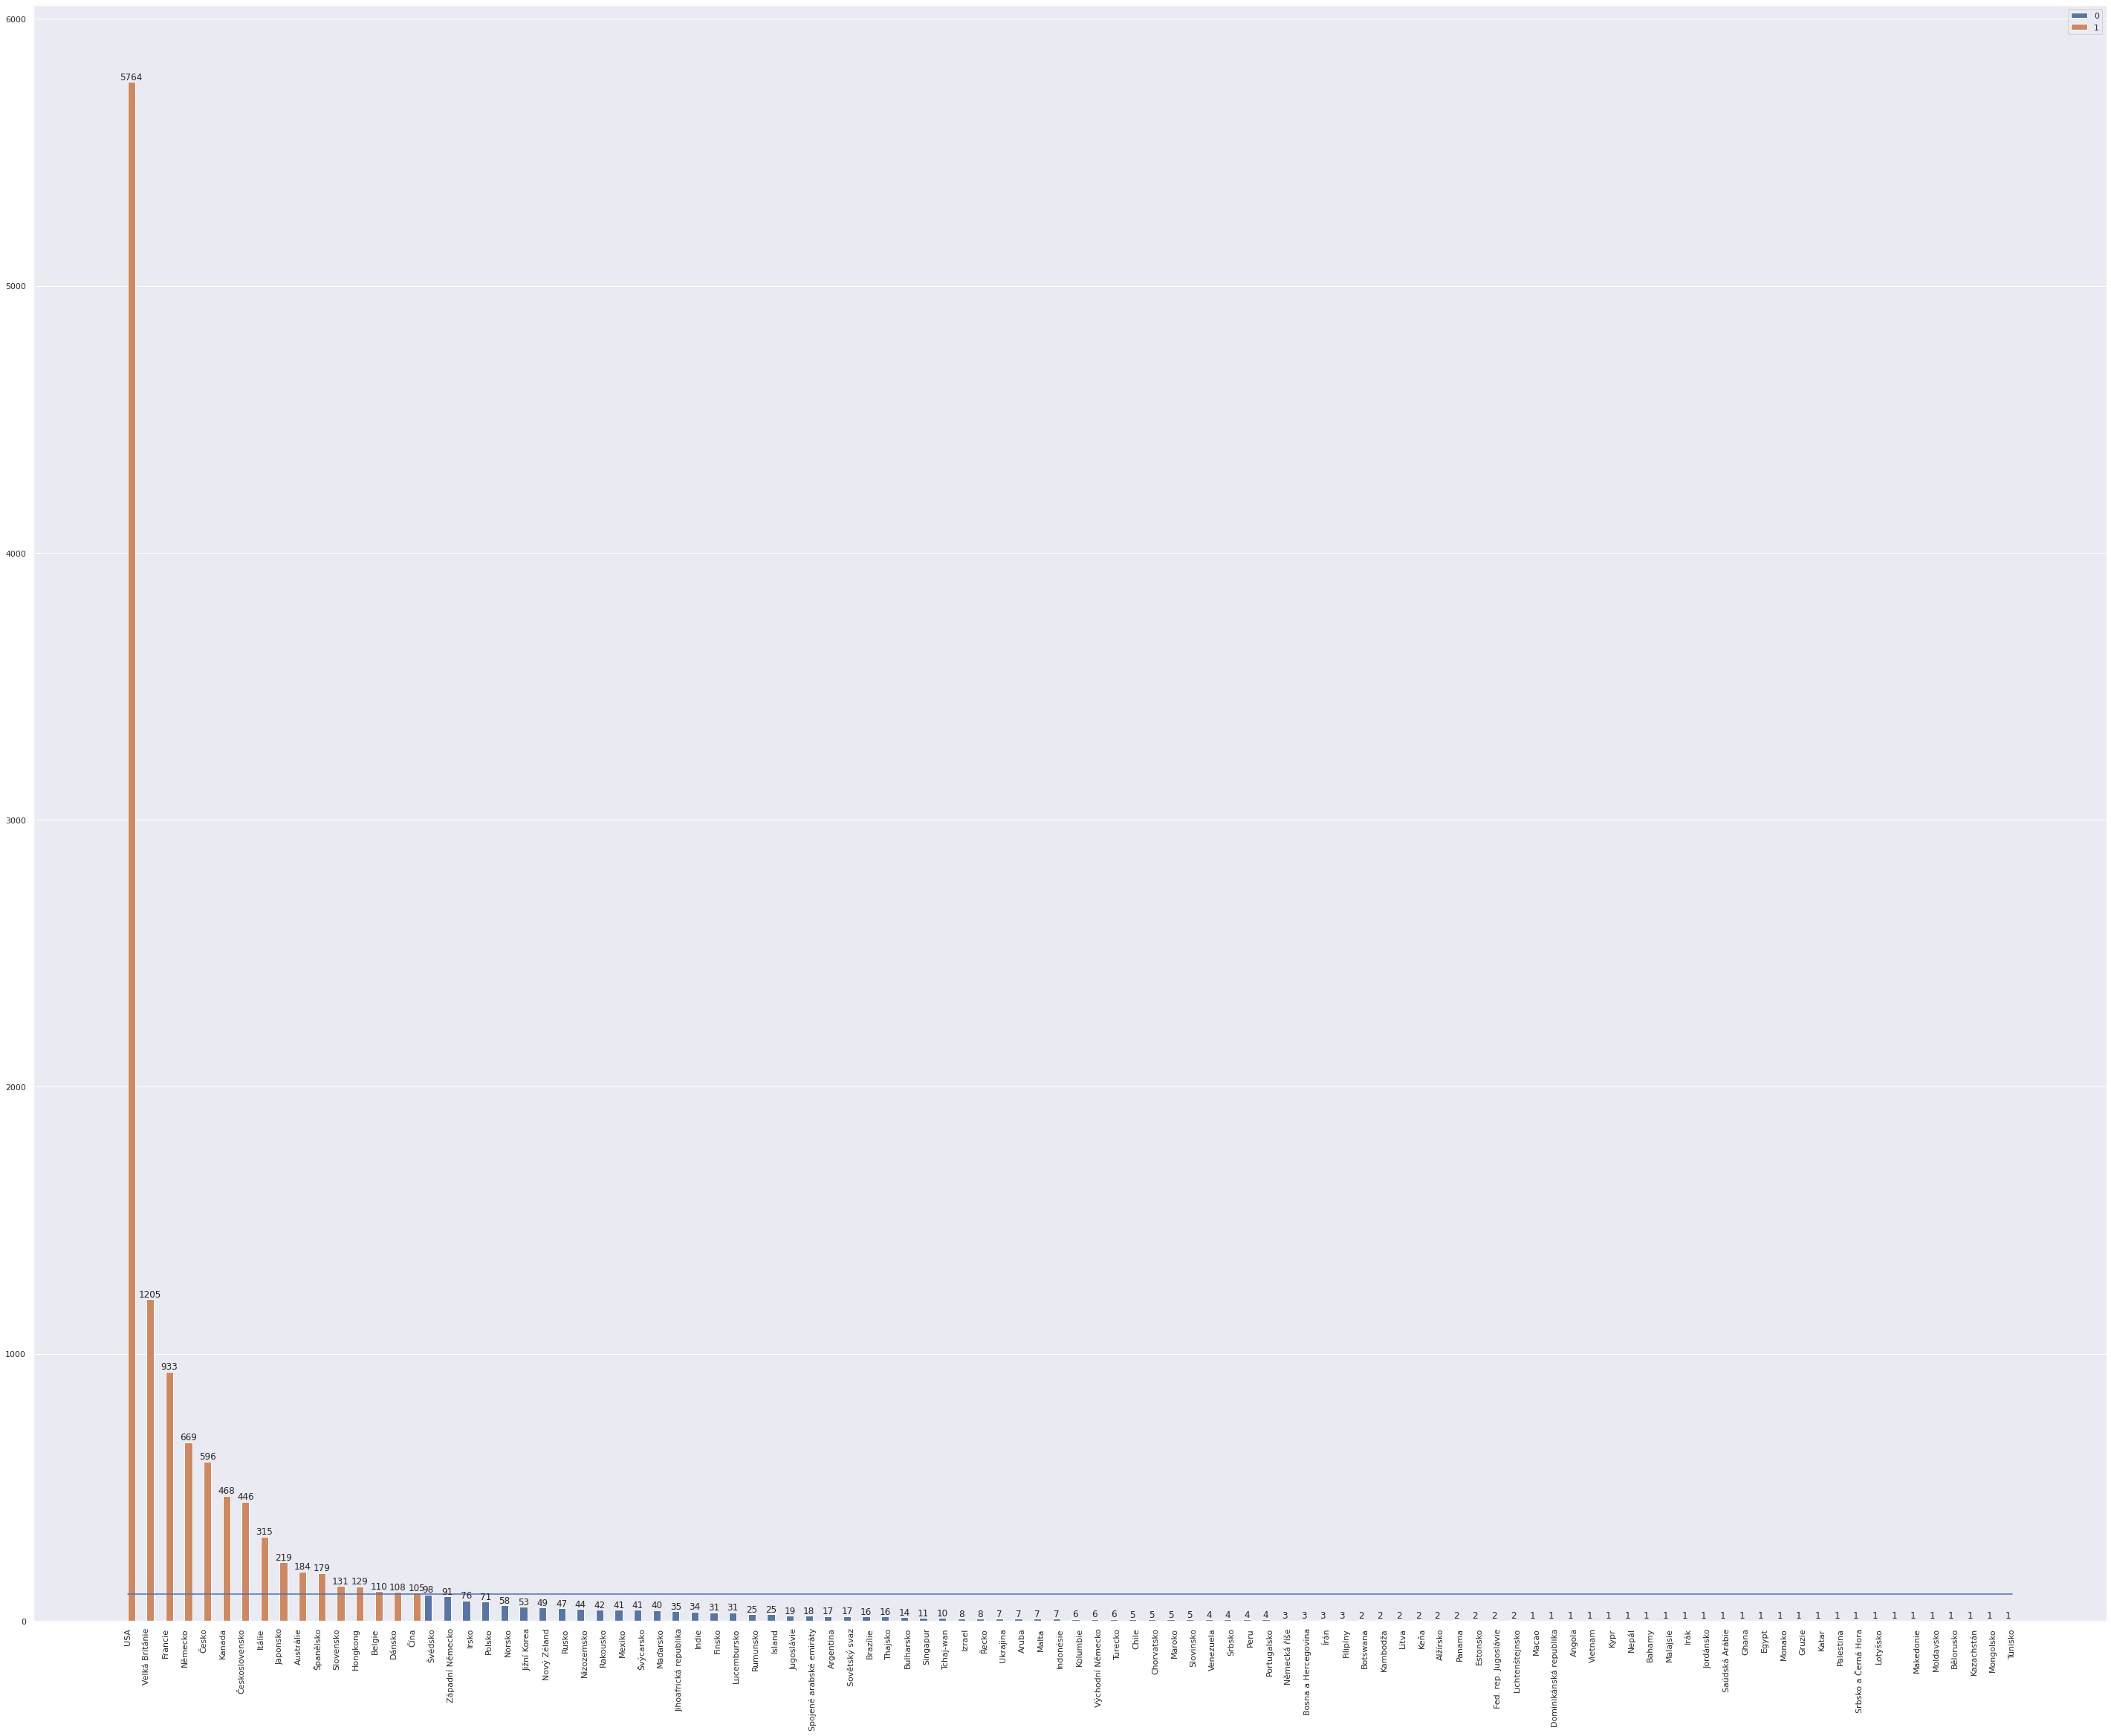

In [8]:
# Bin countries below this threshold to "other" category
thresh = 100 

# Plot the bars
sns.set(rc={'figure.figsize':(50,40)})
ax = sns.barplot(x = countries, y= counts, hue = [1 if c >= thresh else 0 for c in counts])

# Add x axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

# Assign values over the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# Plot threshhold separator
sns.lineplot(x=range(0, len(counts)), y=np.repeat(thresh, len(counts)))

In [9]:
movies.head(3)

,title,description,genres,countries,year,creators
movie_id,,,,,,
230421-houbicky,Houbičky,"Partička amerických teenagerů, která si vyrazi...","[Horor, Thriller]","[Irsko, Velká Británie, Dánsko]",2007,"[Lindsey Haun, Jack Huston, Max Kasch, Paddy B..."
10789-prvni-liga,První liga,V nejvyšší lize získávají hráči baseballu boha...,"[Komedie, Sportovní]",[USA],1989,"[Tom Berenger, Charlie Sheen, Corbin Bernsen, ..."
235032-yes-man,Yes Man,"Carl Allen je zatrpklý bankovní úředník, který...","[Komedie, Romantický]",[USA],2008,"[Jim Carrey, Zooey Deschanel, Bradley Cooper, ..."


## Genres
TODO:


In [10]:
item_count_list_genres = analyse_freq(movies['genres'])
item_count_list_genres

[('Drama', 4245),
 ('Komedie', 3282),
 ('Thriller', 2452),
 ('Akční', 1918),
 ('Romantický', 1537),
 ('Krimi', 1450),
 ('Dobrodružný', 1443),
 ('Horor', 1050),
 ('Sci-Fi', 937),
 ('Mysteriózní', 850),
 ('Fantasy', 840),
 ('Rodinný', 773),
 ('Animovaný', 483),
 ('Životopisný', 454),
 ('Válečný', 405),
 ('Historický', 386),
 ('Hudební', 233),
 ('Sportovní', 221),
 ('Dokumentární', 206),
 ('Psychologický', 174),
 ('Western', 143),
 ('Muzikál', 134),
 ('Pohádka', 124),
 ('Road movie', 82),
 ('Povídkový', 40),
 ('Poetický', 31),
 ('Katastrofický', 31),
 ('Erotický', 21),
 ('Podobenství', 19),
 ('Loutkový', 18),
 ('Film-Noir', 17),
 ('Telenovela', 15),
 ('Taneční', 15),
 ('Experimentální', 9),
 ('Pornografický', 6),
 ('Reality-TV', 4),
 ('Krátkometrážní', 3),
 ('IMAX', 2)]

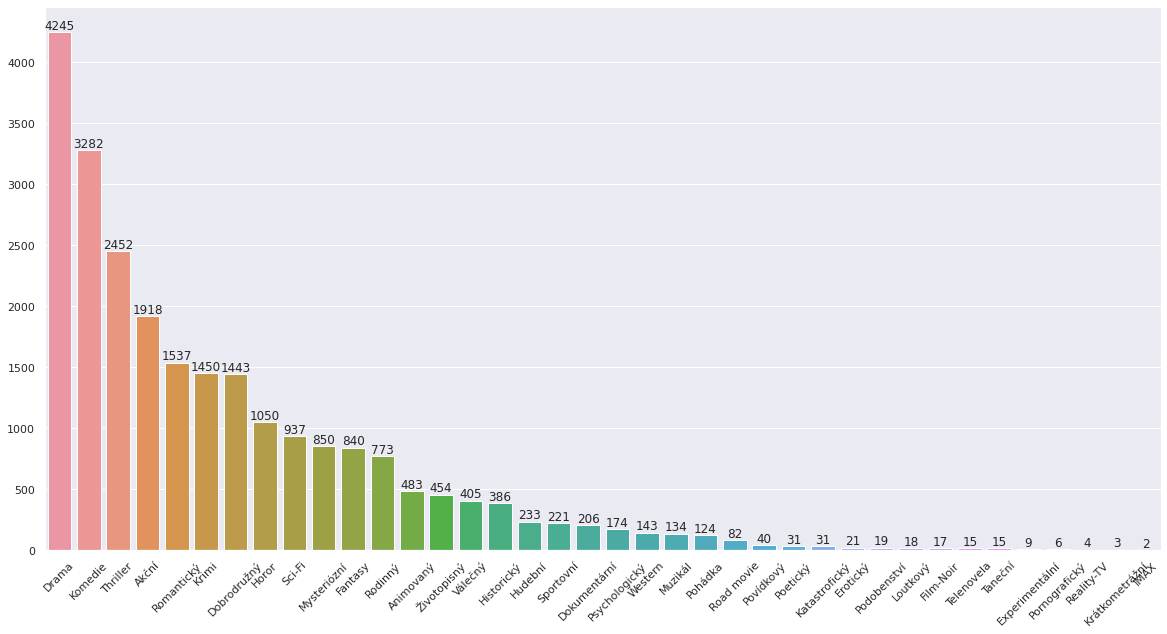

In [11]:
genres, genre_counts = [list(t) for t in zip(*item_count_list_genres)]


# Plot the bars
sns.set(rc={'figure.figsize':(20, 10)})
ax = sns.barplot(x = genres, y= genre_counts)

# Add x axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45);

# Assign values over the bars
ax.bar_label(ax.containers[0]);

The figure below shows top genre combinations in the dataset

In [12]:
all_genres_counts = list(movies.genres.value_counts())
all_genres_labels = list(map(str, movies.genres.value_counts().index.tolist()))
print(f'The total number of combinations is: {len(all_genres_counts)} '
      '-> take a look only at the most relevant ones')

The total number of combinations is: 2424 -> take a look only at the most relevant ones


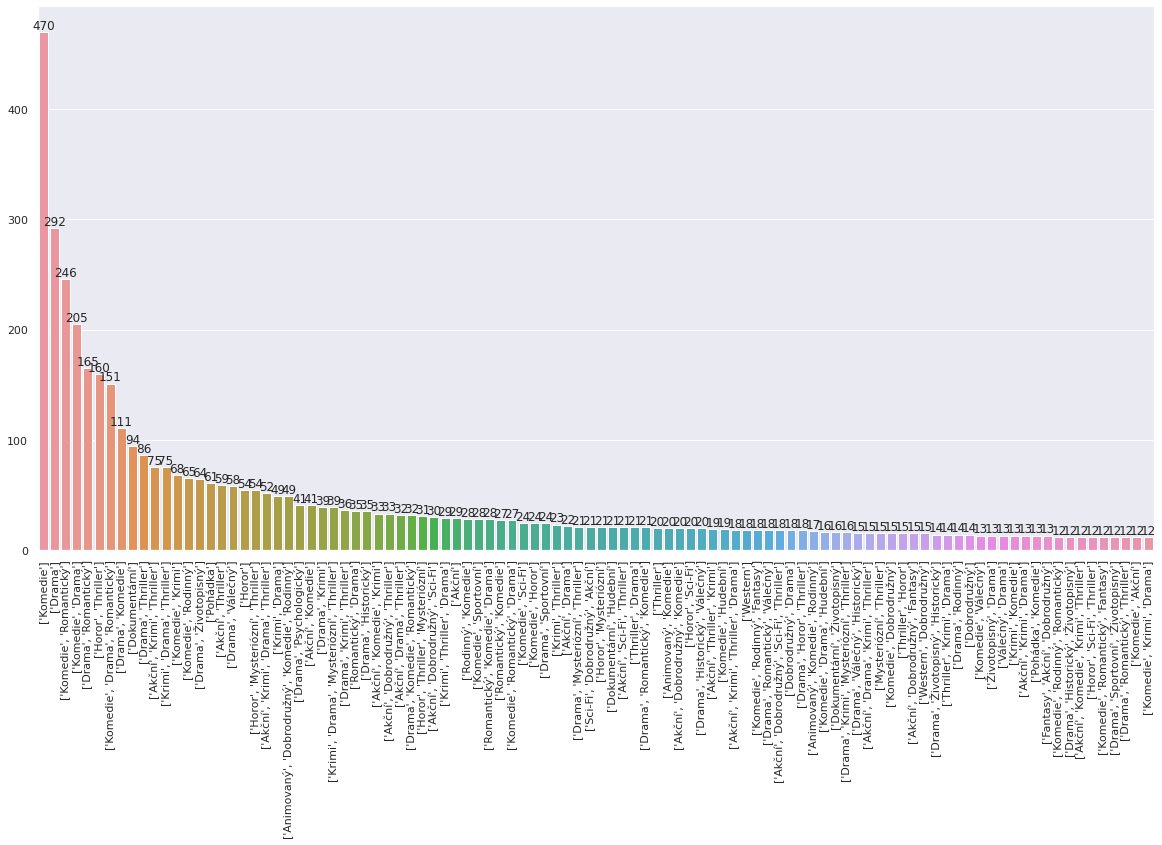

In [13]:
n = 100
xx, yy = all_genres_labels[:n], all_genres_counts[:n]

# Plot the bars
sns.set(rc={'figure.figsize':(20, 10)})
ax = sns.barplot(x = xx, y=yy)

# Add x axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

# Assign values over the bars
ax.bar_label(ax.containers[0]);

In [14]:
# can we use descriptions fo training of sent2vec?
  # how much data do ve have? -> 8674 movies, 1127225 words in total
cumm_len = 0
for x in movies.description: 
    cumm_len += len(x.split(" "))
cumm_len # number of words for in all descriptions

1127225

In [15]:
# distribution of description lengths?
all_lens = []
for x in movies.description: 
    all_lens += [len(x.split(" "))]
cumm_len

1127225

In [16]:
# integer features to int
movies["creators"]

movie_id
230421-houbicky                       [Lindsey Haun, Jack Huston, Max Kasch, Paddy B...
10789-prvni-liga                      [Tom Berenger, Charlie Sheen, Corbin Bernsen, ...
235032-yes-man                        [Jim Carrey, Zooey Deschanel, Bradley Cooper, ...
234754-chlapec-v-pruhovanem-pyzamu    [Asa Butterfield, Jack Scanlon, David Thewlis,...
301717-nejvetsi-showman               [Hugh Jackman, Rebecca Ferguson, Michelle Will...
                                                            ...                        
9443-paralelni-svety                  [Karel Roden, Lenka Vlasáková, Marek Daniel, P...
221264-zivot-jde-dal                  [Jennifer Garner, Timothy Olyphant, Sam Jaeger...
128968-spionky                        [Claire Guyot, Fily Keita, Céline Mauge, Steph...
605767-beautiful-boy                  [Steve Carell, Timothée Chalamet, Maura Tierne...
231250-max-a-maxipriserky             [Max Records, Ryan Corr, Catherine O'Hara, Spi...
Name: creators, Length:

In [19]:
ratings = pd.read_pickle(PROJ_ROOT / 'data' / 'ratings.pkl')
ratings.head(50)

,username,movie_id,stars,date,comment
0,kinghome,230421-houbicky,5.0,2011-11-13,Hodnocení některých šašků tady opravdu necháp...
1,SimonShot,230421-houbicky,5.0,2012-12-19,Tento snímek je zajímavý už jenom tím že se n...
2,blackend,230421-houbicky,5.0,2010-09-04,Pohoda a vzhledem k dobré atmosféře a nízkému...
3,LCH,230421-houbicky,5.0,2013-03-01,No na mě tento film zanechal dobrej dojem.......
4,knoxville,230421-houbicky,5.0,2008-01-16,MUSHIEEE!!! Horory teda nemusim ale tento sa ...
5,PRASÁK,230421-houbicky,5.0,2009-09-07,"Nejsem fanda hororů, vyjma snad děl Stephena ..."
6,lahvi,230421-houbicky,5.0,2011-12-30,Překvapují mě nízká hodnocení. Toto je bezkon...
7,Faustka,230421-houbicky,4.0,2009-04-22,Poměrně solidní schizoušsko-haluzo-houbičková...
8,darkrobyk,230421-houbicky,4.0,2010-08-27,Moje slabost pro les vždycky ovlivní hodnocen...
9,korbitch22,230421-houbicky,4.0,2010-02-05,"u hororu,má jít především o to,aby diváka děs..."


In [20]:
ratings['username'].value_counts()[ratings['username'].value_counts() > 1000]

T2            6401
Martin741     5135
Chrustyn      5086
Anderton      4166
ARI50         3929
              ... 
Rocky88       1007
mala_kea      1007
darkreider    1003
VasaX         1002
MrPierc       1002
Name: username, Length: 400, dtype: int64

In [21]:
movies_htmls = pd.read_pickle(PROJ_ROOT / 'data' / 'movies_htmls.pkl')
movies_htmls.head()

0    <!DOCTYPE html>\n<html lang="cs-CZ">\n\t<head>...
1    <!DOCTYPE html>\n<html lang="cs-CZ">\n\t<head>...
2    <!DOCTYPE html>\n<html lang="cs-CZ">\n\t<head>...
3    <!DOCTYPE html>\n<html lang="cs-CZ">\n\t<head>...
4    <!DOCTYPE html>\n<html lang="cs-CZ">\n\t<head>...
dtype: object

In [22]:
movies_htmls[0]

'<!DOCTYPE html>\n<html lang="cs-CZ">\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n<meta name="description" content="Vše o filmu Houbičky (2007): Recenze, Hodnocení, Zajímavosti, Videa, Galerie, Data uvedení, Diskuze, Filmotéka a další...">\n\n<link rel="alternate" hreflang="cs" href="https://www.csfd.cz/film/230421-houbicky/prehled/">\n<link rel="alternate" hreflang="sk" href="https://www.csfd.sk/film/230421-shrooms/prehlad/">\n\n<link rel="canonical" href="https://www.csfd.cz/film/230421-houbicky/prehled/">\n\n<meta property="og:site_name" content="csfd.cz">\n<meta property="og:image" content="https://image.pmgstatic.com/files/images/film/photos/000/103/103430_97f921.jpg">\n<meta property="og:image" content="https://image.pmgstatic.com/files/images/film/photos/000/106/106657_315ead.jpg">\n<meta property="og:image" content="https://image.pmgstatic.com/files/images/film/photos/000/110/110658_a21a39.jpg">\n<meta pro

# Co s tým?

## Rec Input:
* user (username)
   * history of seen movies

## Rec Output:
* single list of recommendations

## Possible methods
* dividing descriptions and the rest
    * descriptions: 
        * baseline: TF-IDF with cosine similarity on sparse vectors? maybe LSA since the descriptions are short?
        * ...?
        * train sent2vec on descriptions   QUESTION: should we focus only on descriptions to make the model less complex and easier to understand? 

    * the rest:
        * projection to the n-dimensional space 
        * find M most promising clusters (?outliers keep them?)
        * respresent the clusters with its centroid
        * predict best candidates for each cluster
        * weight the cluster with its magnitude (log weights maybe - so even small clusters can be present in the final set)
        * pick L films from each cluster (combine => create a list from all)
        * we assign each picked film a weight based on:
            * size of the cluster of origin
            * distance from the center of the cluster of origin
        

    * the rest II:
        * forget clusters, might return garbage => sample based on density
            
    * => cosine similarity
    * => kNN (? is it suitable ?) 


* kvazi new approach 
    * create separate recomenders for description, genres, country, creators, ?year? 
        * year -> binning -> give weights to movies based on distribution
        * description - sent2vec
        * genres - many-hot encoding  (is this legit)
        * country - many-hot encoding
        * creators - pick ¿composer?, director + top n actors (rec. film) -> compare with all top n from train set (somehow, easy...)
    * join the recommendations into a single list of final rec.
        * HOW? vymyslime priste asi... TODO
---

### Similarity features
* genre
* avg movie rating
* description (TODO: train czech sent2vec)
* year
* director, actors, music? ... (lets not differentiate between the roles. its just a list of relevant people)


## Evaluation
a) divdide user's history into train and test (hidden) subset. generate recommendations using train. compare ratings in recommnedations 'intersect' test sets
  * problem: recommedantions might be good even if the intersection is (almost) empty (metric is good for user with lots of movies)
b) precision and recall (F1 score) for the recommended & hidden set   
c) for each recommended film we pick the closest (with cosine similarity) film from test set. The metric is the mean across such similarities
    * is important for users with only few films (and thus with small test set)


+) fix the size of seen movies -> determine for which users (based on their activity) the model works the best

### Notes:
* \>\>\> how do we weight features? learn the weights vs handcrafted
* genres are sorted lists not sets (genres that come first in the list have higher weight?)
* for countries with less than 100 movies create category 'other'
    * code the countries as multi-hot-encoding

# TODO: 
* ~~convert unstructured `movies[creators]` to dictionary ("hraji" list is sorted by importance)~~ (we decided not to differentiate between the roles -> it is simply a list)
* for each movie compute avg rating across all users
* ~~drop length, foreign title, ?poster? (might not help with recommendations)~~
* train a sent2vec on descriptions and replace the column values with embedding


In [23]:
ratings_sorted = ratings.sort_values(by = 'username')

In [24]:
ratings

,username,movie_id,stars,date,comment
0,kinghome,230421-houbicky,5.0,2011-11-13,Hodnocení některých šašků tady opravdu necháp...
1,SimonShot,230421-houbicky,5.0,2012-12-19,Tento snímek je zajímavý už jenom tím že se n...
2,blackend,230421-houbicky,5.0,2010-09-04,Pohoda a vzhledem k dobré atmosféře a nízkému...
3,LCH,230421-houbicky,5.0,2013-03-01,No na mě tento film zanechal dobrej dojem.......
4,knoxville,230421-houbicky,5.0,2008-01-16,MUSHIEEE!!! Horory teda nemusim ale tento sa ...
...,...,...,...,...,...
2797746,Hanys_,231250-max-a-maxipriserky,0.0,2010-10-02,Utrpení. Nic jiného mě prostě nenapadá. Proto...
2797747,Solverino,231250-max-a-maxipriserky,0.0,2010-02-21,Převeliké utrpení (bohužel jsem nevydržel do ...
2797748,TesterX,231250-max-a-maxipriserky,0.0,2010-03-04,Prezentace choré mysli pro dusevne unikatni j...
2797749,Nathaniell,231250-max-a-maxipriserky,0.0,2019-02-10,"Podobný výtvory točí lidi, který nenávidí dět..."


In [25]:
ratmov = ratings.join(movies, on='movie_id', lsuffix='_left', rsuffix='_right')
ratmov

,username,movie_id,stars,date,comment,title,description,genres,countries,year,creators
0,kinghome,230421-houbicky,5.0,2011-11-13,Hodnocení některých šašků tady opravdu necháp...,Houbičky,"Partička amerických teenagerů, která si vyrazi...","[Horor, Thriller]","[Irsko, Velká Británie, Dánsko]",2007,"[Lindsey Haun, Jack Huston, Max Kasch, Paddy B..."
1,SimonShot,230421-houbicky,5.0,2012-12-19,Tento snímek je zajímavý už jenom tím že se n...,Houbičky,"Partička amerických teenagerů, která si vyrazi...","[Horor, Thriller]","[Irsko, Velká Británie, Dánsko]",2007,"[Lindsey Haun, Jack Huston, Max Kasch, Paddy B..."
2,blackend,230421-houbicky,5.0,2010-09-04,Pohoda a vzhledem k dobré atmosféře a nízkému...,Houbičky,"Partička amerických teenagerů, která si vyrazi...","[Horor, Thriller]","[Irsko, Velká Británie, Dánsko]",2007,"[Lindsey Haun, Jack Huston, Max Kasch, Paddy B..."
3,LCH,230421-houbicky,5.0,2013-03-01,No na mě tento film zanechal dobrej dojem.......,Houbičky,"Partička amerických teenagerů, která si vyrazi...","[Horor, Thriller]","[Irsko, Velká Británie, Dánsko]",2007,"[Lindsey Haun, Jack Huston, Max Kasch, Paddy B..."
4,knoxville,230421-houbicky,5.0,2008-01-16,MUSHIEEE!!! Horory teda nemusim ale tento sa ...,Houbičky,"Partička amerických teenagerů, která si vyrazi...","[Horor, Thriller]","[Irsko, Velká Británie, Dánsko]",2007,"[Lindsey Haun, Jack Huston, Max Kasch, Paddy B..."
...,...,...,...,...,...,...,...,...,...,...,...
2797746,Hanys_,231250-max-a-maxipriserky,0.0,2010-10-02,Utrpení. Nic jiného mě prostě nenapadá. Proto...,Max a maxipříšerky,Novátorský režisér Spike Jonze spolupracoval s...,"[Dobrodružný, Drama, Rodinný, Fantasy]","[USA, Německo, Austrálie]",2009,"[Max Records, Ryan Corr, Catherine O'Hara, Spi..."
2797747,Solverino,231250-max-a-maxipriserky,0.0,2010-02-21,Převeliké utrpení (bohužel jsem nevydržel do ...,Max a maxipříšerky,Novátorský režisér Spike Jonze spolupracoval s...,"[Dobrodružný, Drama, Rodinný, Fantasy]","[USA, Německo, Austrálie]",2009,"[Max Records, Ryan Corr, Catherine O'Hara, Spi..."
2797748,TesterX,231250-max-a-maxipriserky,0.0,2010-03-04,Prezentace choré mysli pro dusevne unikatni j...,Max a maxipříšerky,Novátorský režisér Spike Jonze spolupracoval s...,"[Dobrodružný, Drama, Rodinný, Fantasy]","[USA, Německo, Austrálie]",2009,"[Max Records, Ryan Corr, Catherine O'Hara, Spi..."
2797749,Nathaniell,231250-max-a-maxipriserky,0.0,2019-02-10,"Podobný výtvory točí lidi, který nenávidí dět...",Max a maxipříšerky,Novátorský režisér Spike Jonze spolupracoval s...,"[Dobrodružný, Drama, Rodinný, Fantasy]","[USA, Německo, Austrálie]",2009,"[Max Records, Ryan Corr, Catherine O'Hara, Spi..."
